In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from glob import glob
import io
import os
import math
import json
import pprint
from plydata import define, query, select, head, do, group_by, summarize, arrange, left_join, distinct
import duckdb

from tabulate import tabulate
def print_table(table):
    print(tabulate(table, headers='keys', showindex=False, tablefmt='presto'))

In [2]:
import tensorflow as tf

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/data/creditcard.zip',
    fname='creditcard.zip',
    extract=True)

69155632/69155632 [==============================] - 22s 0us/step


In [8]:
df = pd.read_csv(zip_path)

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 31)

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
df.columns = df.columns.str.lower()

In [17]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support

In [18]:
features = ['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v26', 'v27', 'v28', 'amount',]

label = 'class'

In [20]:
X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [21]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

/opt/anaconda3/envs/localds/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [27]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[   33,    69],
       [   29, 56831]])

In [28]:
y_test.sum()

102

In [33]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, labels=[1,0])

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.53225806 0.99878735]
recall: [0.32352941 0.99948998]
fscore: [0.40243902 0.99913854]
support: [  102 56860]


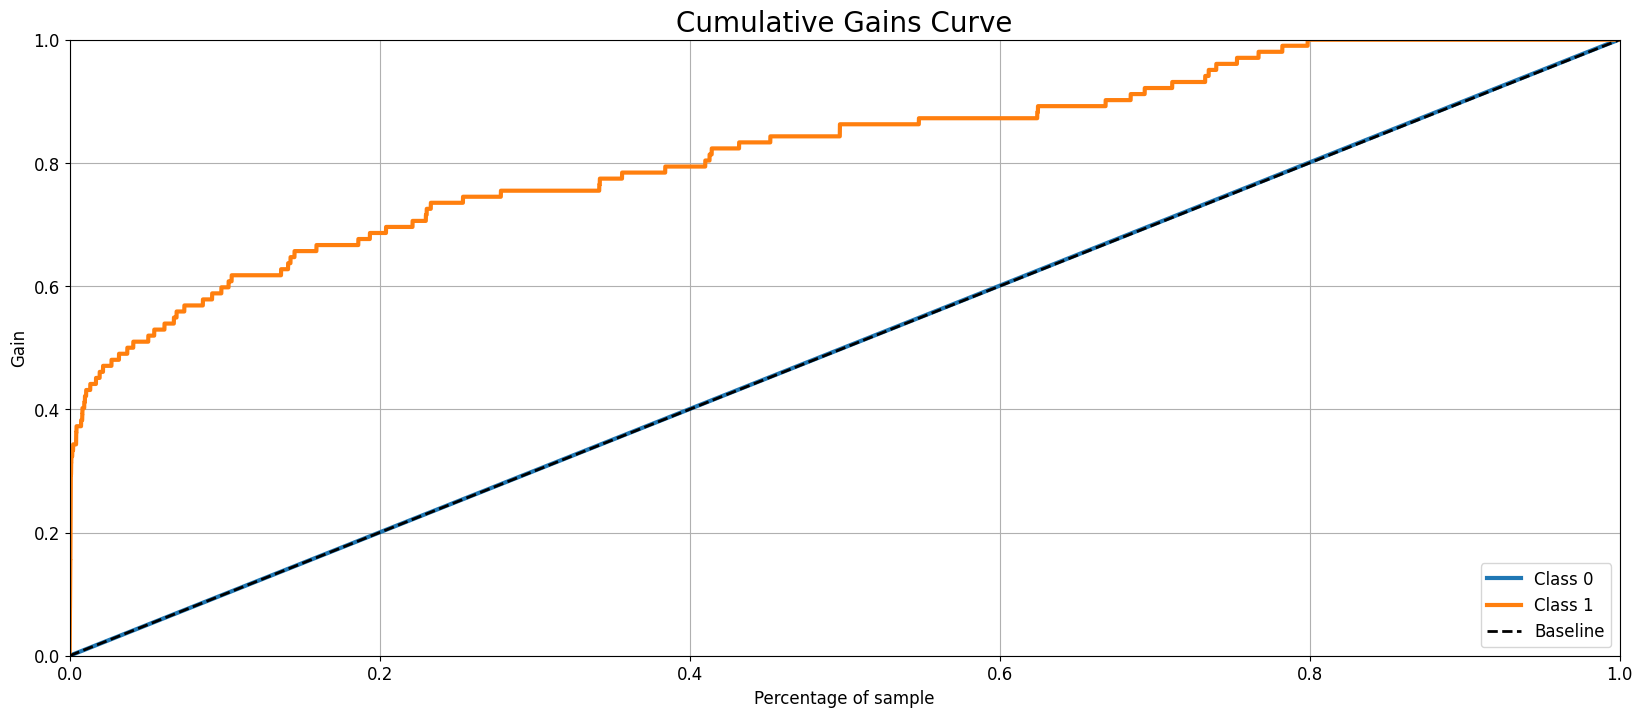

In [38]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(
    y_test,
    y_pred_proba,
    figsize=(20,8),
    title_fontsize=20,
    text_fontsize=12
)

plt.xlim([0,1])
plt.show()

In [41]:
import statsmodels.api as sm

In [42]:
model = sm.Logit(y_train, sm.add_constant(X_train))
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.006372
         Iterations 12


In [44]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:               227845
Model:                          Logit   Df Residuals:                   227834
Method:                           MLE   Df Model:                           10
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                  0.4948
Time:                        23:05:13   Log-Likelihood:                -1451.9
converged:                       True   LL-Null:                       -2874.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5039      0.168    -44.683      0.000      -7.833      -7.175
time       -7.912e-06   1.51e-06     -5.224      0.000   -1.09e-05   -4.94e-06
v1             0.1484      0.026      5.794      0.0